# Title: Original Random Forest for 507 Project
## Author: Diana Liang
## Date: 4/3/2020

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('food_health.csv')

In [4]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,
                                                   random_state=0)
miss_train = IterativeImputer(max_iter=100, random_state=0)
new_X_train = miss_train.fit_transform(X_train)
miss_test = IterativeImputer(max_iter=100, random_state=0)
new_X_test = miss_test.fit_transform(X_test)

In [5]:
oob = []
for each_num in [1000, 5000, 7500]:
    for each_max in [2, 3, 4, 5]:
        tree = RandomForestClassifier(n_estimators=each_num, max_features=each_max, oob_score = True, random_state=0)
        tree.fit(new_X_train, Y_train)
        oob.append(tree.oob_score_)
        print('tree:', each_num, 'feat:', each_max)

tree: 1000 feat: 2
tree: 1000 feat: 3
tree: 1000 feat: 4
tree: 1000 feat: 5
tree: 5000 feat: 2
tree: 5000 feat: 3
tree: 5000 feat: 4
tree: 5000 feat: 5
tree: 7500 feat: 2
tree: 7500 feat: 3
tree: 7500 feat: 4
tree: 7500 feat: 5


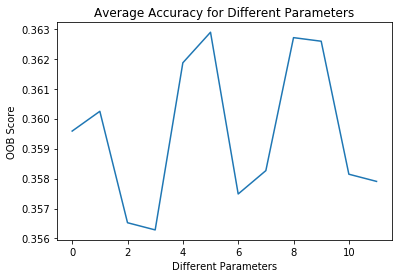

In [7]:
plt.plot(oob)
plt.title("Average Accuracy for Different Parameters")
plt.xlabel("Different Parameters")
plt.ylabel("OOB Score")
#plt.savefig('oob.png')

Text(0, 0.5, 'OOB Score')

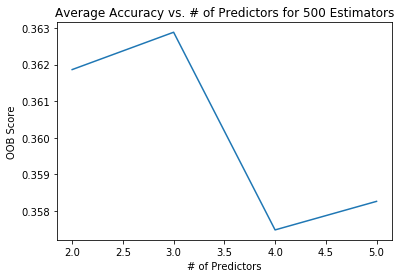

In [8]:
plt.plot([2, 3, 4, 5], oob[4:8])
plt.title("Average Accuracy vs. # of Predictors for 500 Estimators")
plt.xlabel("# of Predictors")
#plt.ylabel("OOB Score")

In [6]:
model = RandomForestClassifier(n_estimators=5000, max_features=3, oob_score = True, random_state=0)
model.fit(new_X_train, Y_train)
Y_pred = model.predict(new_X_test)
accuracy_score(Y_test, Y_pred)

0.36427415002698327

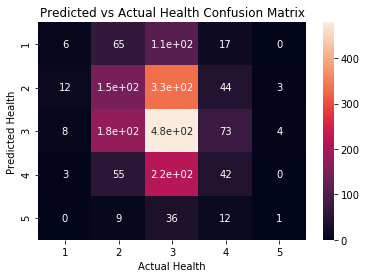

In [13]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True)
plt.title("Predicted vs Actual Health Confusion Matrix")
plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
#plt.savefig("con_mat.png")

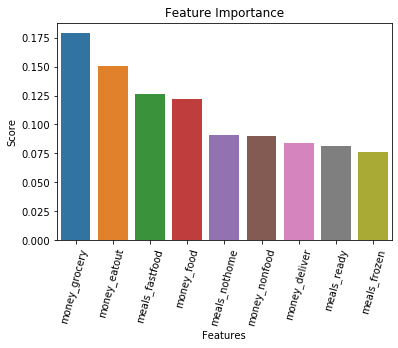

In [11]:
feat_import = pd.DataFrame({'Features': list(X.columns),
                            'Score': list(model.feature_importances_)}).sort_values(by='Score', ascending=False)
sns.barplot(x=feat_import.Features, y=feat_import.Score)
plt.title("Feature Importance")
plt.xticks(rotation=75)
#plt.savefig("var_imp.png")